In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../../input/Lago_Sintetico_Testes/'
geo_model = gp.create_model('SyntheitcBasinTeste5')

In [3]:
gp.init_data(geo_model,
             extent=[0, 4000, 0, 4000, 0, 1700],
             resolution=[50, 50, 50],
             path_i=data_path + "3_sintetico_maior/surface_points.csv",
             path_o=data_path + "3_sintetico_maior/orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste5  2023-03-09 17:06

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Formacao_1,Default series,1,#015482,1
1,Formacao_2,Default series,2,#9f0052,2
2,Formacao_3,Default series,3,#ffbe00,3
3,Formacao_4,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series": ('Formacao_4', 'Formacao_3',
                                              'Formacao_1', 'Formacao_2')})

,surface,series,order_surfaces,color,id
0,Formacao_1,Strat_Series,1,#015482,1
1,Formacao_2,Strat_Series,2,#9f0052,2
2,Formacao_3,Strat_Series,3,#ffbe00,3
3,Formacao_4,Strat_Series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [6]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [ ]:
geo_model.set_is_fault(['Fault_Series','Fault_Series_2'])

In [7]:
geo_model.additional_data

values
Structure isLith                                          True
          isFault                                        False
          number faults                                      0
          number surfaces                                    4
          number series                                      2
          number surfaces per series                    [4, 0]
          len surfaces surface_points         [42, 42, 47, 22]
          len series surface_points                   [153, 0]
          len series orientations                       [2, 0]
Options   dtype                                        float64
          output                                       geology
          theano_optimizer                        fast_compile
          device                                           cpu
          verbosity                                       None
Kriging   range                                     5906.77577
          $C_o$                                  830714.285714
          drift equations                               [3, 3]
Rescaling rescaling factor                                7400
          centers                      [1850.0, 1900.0, 900.0]

In [8]:
geo_model.grid

Grid Object. Values: 
array([[  40.,   40.,   17.],
       [  40.,   40.,   51.],
       [  40.,   40.,   85.],
       ...,
       [3960., 3960., 1615.],
       [3960., 3960., 1649.],
       [3960., 3960., 1683.]])

In [9]:
geo_model.get_active_grids()

array(['regular'], dtype='<U10')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


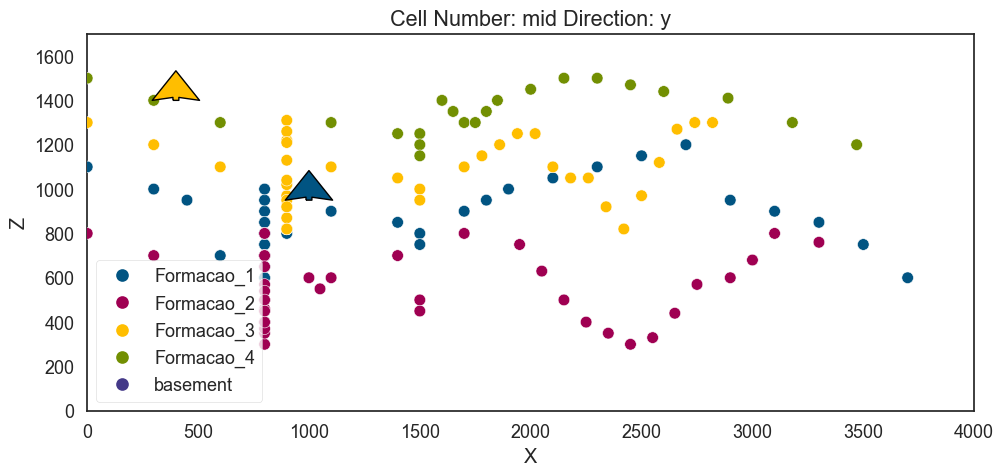

In [10]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [12]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1000,1000,950,1.000000e-12,1.000000e-12,1.0,0.01,Formacao_1
1,400,1000,1400,1.000000e-12,1.000000e-12,1.0,0.01,Formacao_3


In [ ]:
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [13]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [14]:
gp.set_interpolator(geo_model)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range               5906.77577
$C_o$            830714.285714
drift equations         [3, 3]


In [15]:
sol = gp.compute_model(geo_model)

In [16]:
sol


Lithology ids 
  [2.99999979 3.00000002 3.00000135 ... 1.         1.         1.        ] 

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


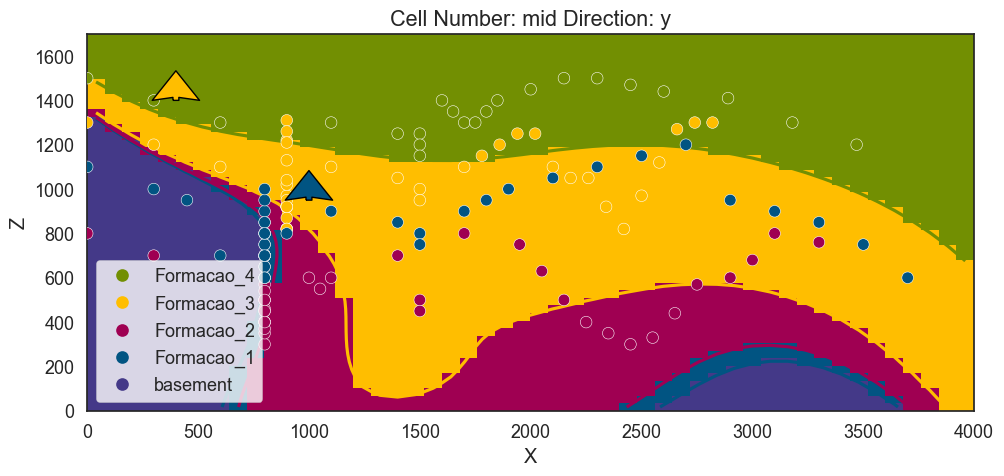

In [17]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

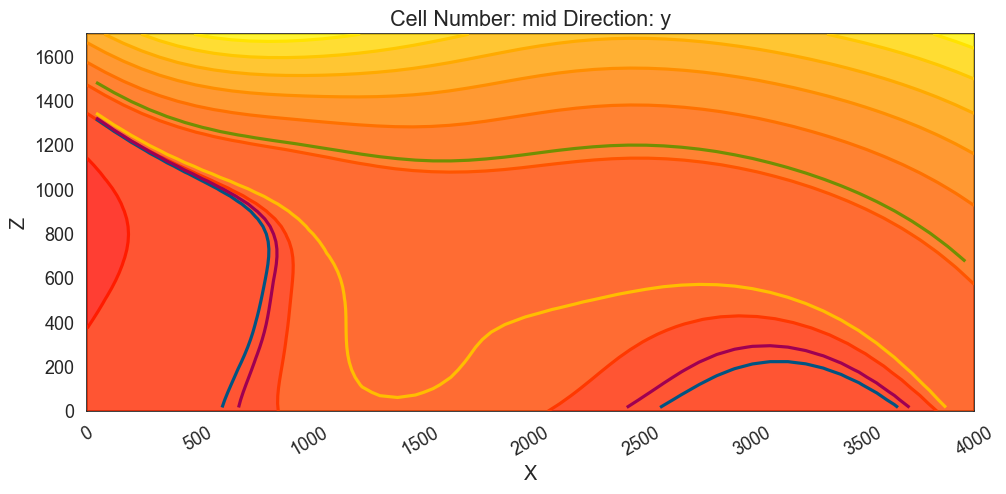

In [18]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

In [19]:
geo_model.solutions.scalar_field_at_surface_points

array([[0.08948711, 0.08965444, 0.09037972, 0.09613617]])

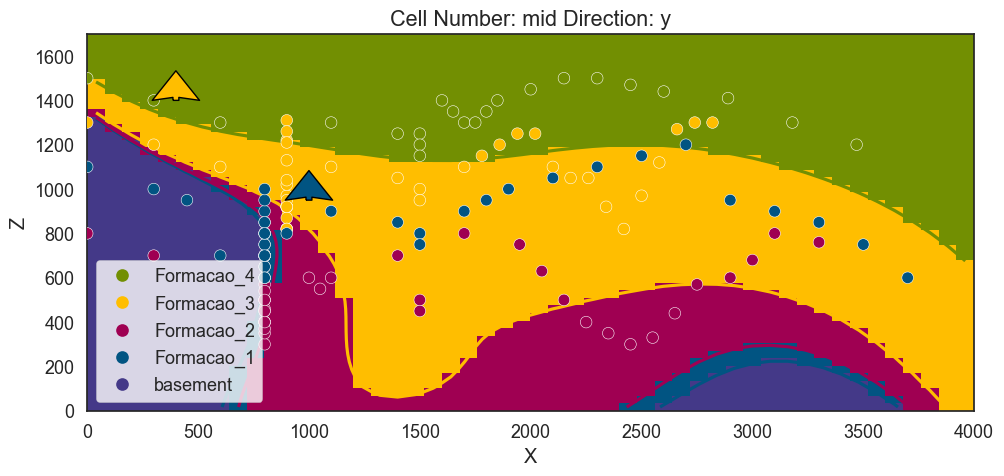

In [20]:
gp.plot_2d(geo_model, show_block=True, show_lith=False)
plt.show()

In [21]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:624: PyVistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyVistaDeprecationWarning,
C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [ ]:
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_boundaries=False, show_data=True)
plt.show()

In [ ]:
g3d = gp.plot_3d(geo_model,
                 show_topography=True,
                 show_lith=False,
                 show_surfaces=False,
                 show_results=False)